In [2]:
# libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

# Контрольная работа

### Задача 1.

          year         Y         K         L
year  1.000000  0.883340  0.897989  0.986885
Y     0.883340  1.000000  0.943326  0.873474
K     0.897989  0.943326  1.000000  0.905540
L     0.986885  0.873474  0.905540  1.000000
            year            Y           K           L
year   35.000000   169.105263   99.078947  169.263158
Y     169.105263  1047.105263  569.289474  819.421053
K      99.078947   569.289474  347.818421  489.605263
L     169.263158   819.421053  489.605263  840.473684
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     145.4
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           4.66e-10
Time:                        21:06:31   Log-Likelihood:                -75.343
No. Observations:              

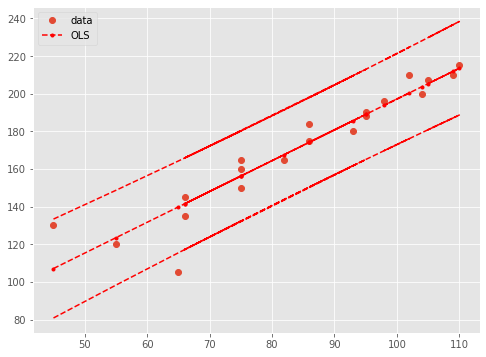

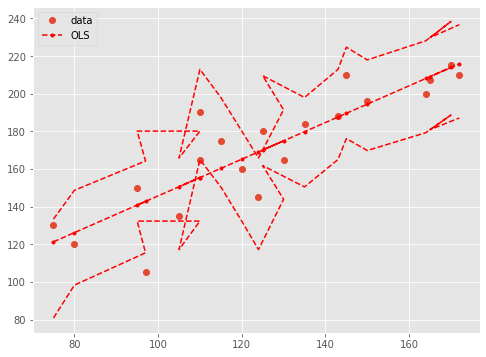

In [5]:
# импорт данных
df= pd.read_csv('kr1.csv',delimiter=';')
k = np.array(df['K']).reshape(-1,1)
l = np.array(df['L']).reshape(-1,1)
y = np.array(df['Y']).reshape(-1,1)

# обучение модели
modelYK = LinearRegression().fit(k,y) 
modelYL = LinearRegression().fit(l,y) 

covar = df.cov() # ковариация
correl = df.corr() # корреляция

# коэффициенты парных линейных регрессий
modYK = smf.ols(formula='y ~ k', data=df).fit()
modYL = smf.ols(formula='y ~ l', data=df).fit()


# доверительный интервал оценки отклика
# Y~K
pred_ols1 = modYK.get_prediction()
iv_l1 = pred_ols1.summary_frame()["obs_ci_lower"]
iv_u1 = pred_ols1.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(k, y, "o", label="data")
ax.plot(k, modYK.fittedvalues, "r--.", label="OLS")
ax.plot(k, iv_u1, "r--")
ax.plot(k, iv_l1, "r--")
ax.legend(loc="best")

# Y~L
pred_ols2 = modYL.get_prediction()
iv_l2 = pred_ols2.summary_frame()["obs_ci_lower"]
iv_u2 = pred_ols2.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(l, y, "o", label="data")
ax.plot(l, modYL.fittedvalues, "r--.", label="OLS")
ax.plot(l, iv_u1, "r--")
ax.plot(l, iv_l1, "r--")
ax.legend(loc="best")


# вывод
print(correl)
print(covar)
print(modYK.summary())
print(modYL.summary())


Задача 2.

In [11]:
# импорт данных
df= pd.read_csv('kr2.csv',delimiter=';')
# модель и вывод саммари
mod1 = smf.ols(formula='Y~I(1/X)', data=df).fit()
mod2 = smf.ols(formula='I(np.log(Y))~I(np.log(X))', data=df).fit()
print(mod1.summary())
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     184.2
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           8.34e-07
Time:                        23:44:57   Log-Likelihood:                -8.6578
No. Observations:                  10   AIC:                             21.32
Df Residuals:                       8   BIC:                             21.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5393      0.304     41.204      0.0

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
# импорт данных
df= pd.read_csv('kr1.csv',delimiter=';')
k = np.array(df['K']).reshape(-1,1)
l = np.array(df['L']).reshape(-1,1)
y = np.array(df['Y']).reshape(-1,1)

# модель и вывод саммари
mod1 = smf.ols(formula='y~l+k', data=df).fit()
mod2 = smf.ols(formula='I(np.log(y/l))~I(np.log(k/l))', data=df).fit()
print(mod1.summary())
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     70.15
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           6.12e-09
Time:                        15:10:49   Log-Likelihood:                -75.155
No. Observations:                  20   AIC:                             156.3
Df Residuals:                      17   BIC:                             159.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.5136     12.048      2.699      0.0